<a href="https://colab.research.google.com/github/SnehiCodes/advances-in-computer-detection-early-detection-of-melanoma/blob/main/basics_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install opencv-python numpy pillow scikit-image

In [17]:
import json

# !!! REPLACE 'YOUR_KAGGLE_USERNAME' and 'YOUR_API_KEY_HERE' !!!
# Note: The API key is the part AFTER 'KGAT_'
data = {
    "username": "snehij",
    "key": "ace6d39cb4af97f76709f116d77229ac"  # The 32-character string
}

# Write the data dictionary to the kaggle.json file
with open("kaggle.json", "w") as f:
    json.dump(data, f)

print("kaggle.json file created successfully in your Colab file system.")

kaggle.json file created successfully in your Colab file system.


In [18]:
# Create the directory if it doesn't exist
!mkdir -p ~/.kaggle

# Move the file there
!cp kaggle.json ~/.kaggle/

# Set permissions so only you can read/write the file
!chmod 600 ~/.kaggle/kaggle.json

In [19]:
!mkdir -p /content/isic_images

In [20]:
# Unzip from your specific Drive folder to the local Colab disk
!unzip -q "/content/drive/MyDrive/isic_2024/ISIC_2024_Training_Input.zip" -d /content/isic_data

replace /content/isic_data/ISIC_2024_Training_Input/ATTRIBUTION.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [21]:
import os

folder_path = '/content/isic_data'

if os.path.exists(folder_path):
    file_count = len(os.listdir(folder_path))
    print(f"Folder exists with {file_count} files.")
    if file_count > 0:
        print("Data is already there! You can skip the unzip step.")
else:
    print("Folder is empty or doesn't exist. You should unzip.")

Folder exists with 1 files.
Data is already there! You can skip the unzip step.


In [22]:
import os

# List the first 10 files to make sure they are there
files = os.listdir('/content/isic_data')
print(f"Total files found: {len(files)}")
print("Sample files:", files[:10])

Total files found: 1
Sample files: ['ISIC_2024_Training_Input']


In [23]:
import pandas as pd

# If the CSV was inside the ZIP, it will be in /content/isic_data/
# Adjust the filename if it's named differently
metadata_path = '/content/isic_data/train-metadata.csv'

if os.path.exists(metadata_path):
    df = pd.read_csv(metadata_path)
    print("Metadata loaded!")
    display(df.head())
else:
    print("Metadata CSV not found in the unzipped folder. Check your Drive folder for it.")

Metadata CSV not found in the unzipped folder. Check your Drive folder for it.


In [24]:
import os
print(os.listdir('/content/isic_data'))

['ISIC_2024_Training_Input']


In [25]:
# This lists all directories and files inside isic_data
!ls -R /content/isic_data | head -n 30

/content/isic_data:
ISIC_2024_Training_Input

/content/isic_data/ISIC_2024_Training_Input:
ATTRIBUTION.txt
ISIC_0015670.jpg
ISIC_0015845.jpg
ISIC_0015864.jpg
ISIC_0015902.jpg
ISIC_0024200.jpg
ISIC_0035502.jpg
ISIC_0051648.jpg
ISIC_0051665.jpg
ISIC_0051710.jpg
ISIC_0051758.jpg
ISIC_0051812.jpg
ISIC_0051822.jpg
ISIC_0051896.jpg
ISIC_0051897.jpg
ISIC_0051958.jpg
ISIC_0051983.jpg
ISIC_0052003.jpg
ISIC_0052004.jpg
ISIC_0052026.jpg
ISIC_0052042.jpg
ISIC_0052068.jpg
ISIC_0052094.jpg
ISIC_0052109.jpg
ISIC_0052122.jpg
ISIC_0052164.jpg


In [26]:
!cp /content/drive/MyDrive/isic_2024/train-metadata.csv /content/isic_data/

cp: cannot stat '/content/drive/MyDrive/isic_2024/train-metadata.csv': No such file or directory


In [27]:
# List the files in the competition to see the exact metadata filename
!kaggle competitions files -c isic-2024

# Download the metadata file specifically (it's usually small)
!kaggle competitions download -c isic-2024 -f train-metadata.csv

# Unzip it if it came as a .zip, otherwise it's ready
!unzip -o train-metadata.csv.zip

401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/data/list/isic-2024?pagesize=20
401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/data/download/isic-2024/train-metadata.csv
unzip:  cannot find or open train-metadata.csv.zip, train-metadata.csv.zip.zip or train-metadata.csv.zip.ZIP.


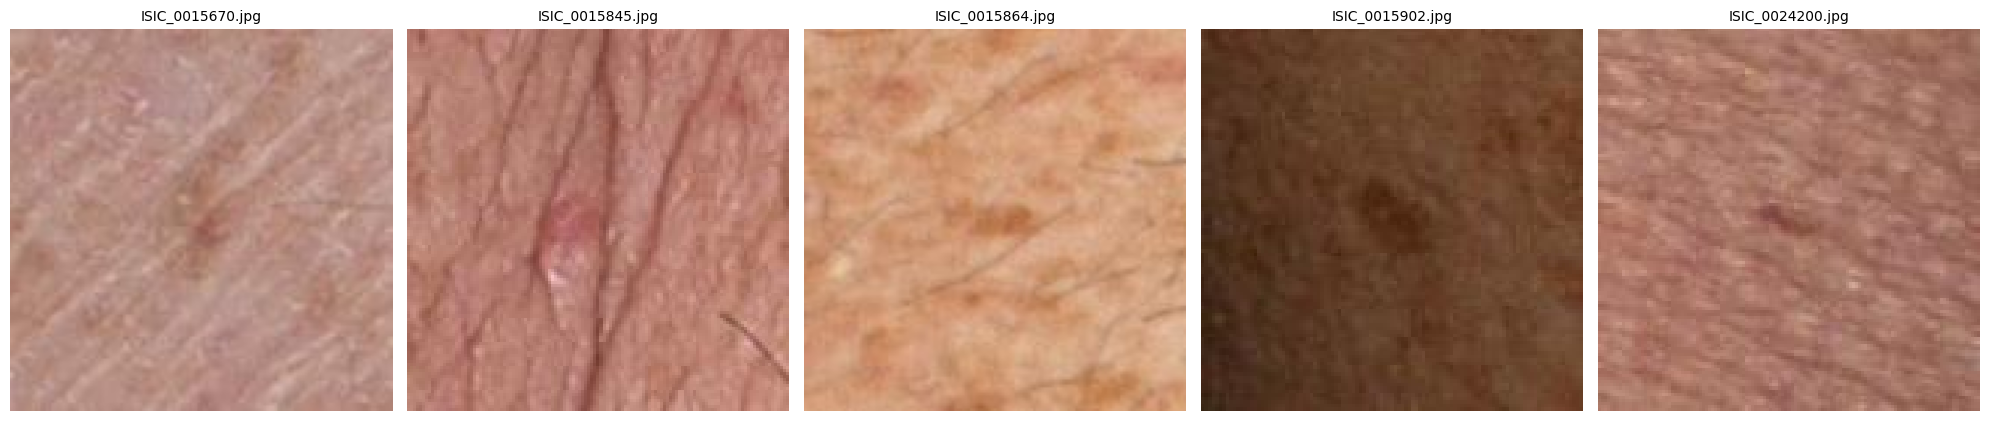

In [28]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder you found earlier
img_dir = '/content/isic_data/ISIC_2024_Training_Input'

# 1. Get a list of all files in that folder
# We filter for .jpg files just in case there are other files like ATTRIBUTION.txt
all_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]

# 2. Sort them so they appear in order
all_files.sort()

# 3. Take the first 5
sample_files = all_files[:5]

# 4. Display them
plt.figure(figsize=(20, 5))

for i, filename in enumerate(sample_files):
    img_path = os.path.join(img_dir, filename)
    img = Image.open(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(filename, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [32]:
!unzip -o "/content/drive/MyDrive/isic_2024/train-metadata.csv.zip"

Archive:  /content/drive/MyDrive/isic_2024/train-metadata.csv.zip
  inflating: train-metadata.csv      


In [33]:
import pandas as pd

# Load the unzipped CSV
df = pd.read_csv('train-metadata.csv')

# Display the first 5 rows and the total count of images
print(f"Total rows in metadata: {len(df)}")
display(df.head())

/tmp/ipython-input-1280521932.py:4: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train-metadata.csv')


Total rows in metadata: 401059


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [37]:
import cv2
import numpy as np
import os
from pathlib import Path
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor

# --- CONFIGURATION ---
INPUT_DIR = Path('/content/isic_data/ISIC_2024_Training_Input')
OUTPUT_DIR = Path('/content/isic_224')
TARGET_SIZE = (224, 224)

# Ensure output directory exists
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

def process_single_image(img_path):
    """Combines hair removal and resizing into one parallel task."""
    try:
        # 1. Load image
        img = cv2.imread(str(img_path))
        if img is None:
            return

        # 2. HAIR REMOVAL (Black-Hat Filtering)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17))
        blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
        _, mask = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
        cleaned = cv2.inpaint(img, mask, 1, cv2.INPAINT_TELEA)

        # 3. RESIZE (Standardizing for ResNet/DenseNet)
        # INTER_AREA is recommended for shrinking images to avoid artifacts
        resized = cv2.resize(cleaned, TARGET_SIZE, interpolation=cv2.INTER_AREA)

        # 4. Save to new directory
        save_path = OUTPUT_DIR / img_path.name
        cv2.imwrite(str(save_path), resized)

    except Exception as e:
        print(f"Error processing {img_path.name}: {e}")

if __name__ == '__main__':
    # Get all image paths
    image_paths = list(INPUT_DIR.glob('*.jpg'))

    print(f"Starting parallel processing for {len(image_paths)} images...")
    print(f"Outputting to: {OUTPUT_DIR}")

    # ProcessPoolExecutor manages a pool of processes to maximize CPU usage
    with ProcessPoolExecutor() as executor:
        # We use a list with tqdm to track progress across all processes
        list(tqdm(executor.map(process_single_image, image_paths), total=len(image_paths)))

Starting parallel processing for 401059 images...
Outputting to: /content/isic_224


100%|██████████| 401059/401059 [31:29<00:00, 212.29it/s]


In [39]:
# Update your dataframe to point to the CLEANED folder
df['image_path'] = df['isic_id'].apply(lambda x: os.path.join('/content/isic_cleaned_images', f"{x}.jpg"))

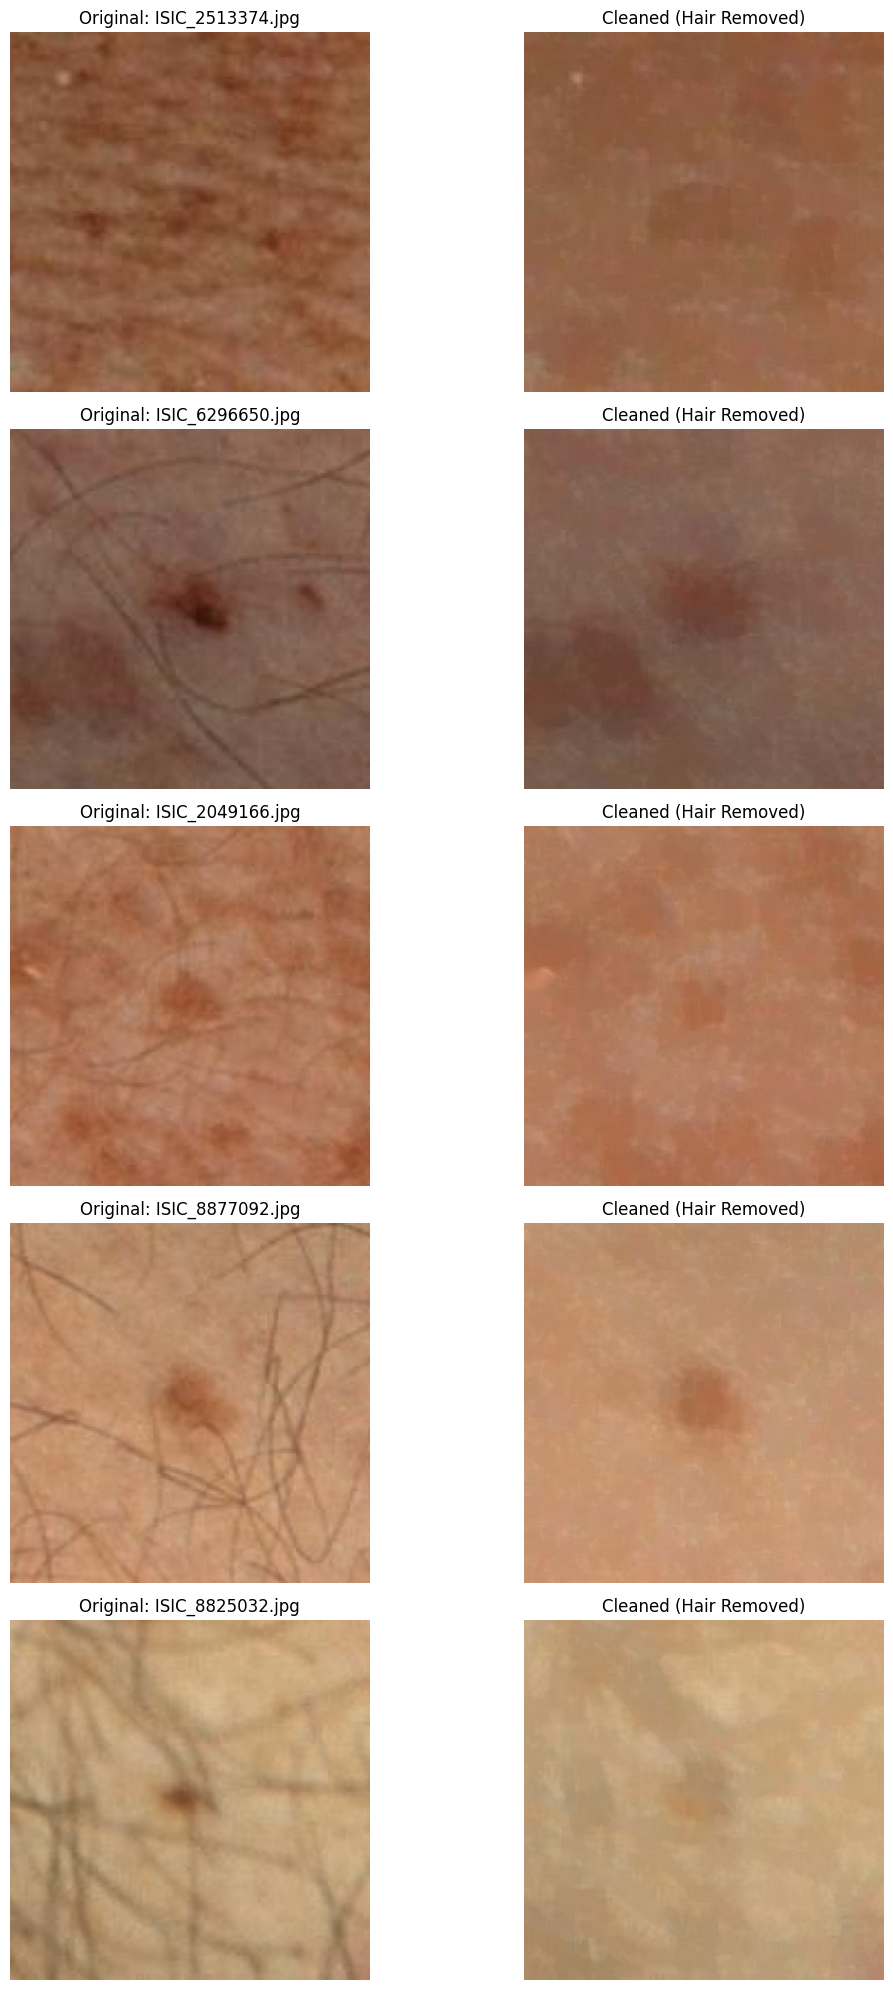

In [40]:
import cv2
import os
import random
import matplotlib.pyplot as plt

def apply_hair_removal(img):
    # Black-Hat filtering for artifact detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17))
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

    # Create mask and inpaint
    _, mask = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
    cleaned = cv2.inpaint(img, mask, 1, cv2.INPAINT_TELEA)
    return cleaned

# Paths
img_dir = '/content/isic_data/ISIC_2024_Training_Input'
all_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]
sample_files = random.sample(all_files, 5)

# Setup Subplots: 5 rows (one for each image), 2 columns (Before and After)
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

for i, filename in enumerate(sample_files):
    img_path = os.path.join(img_dir, filename)
    img = cv2.imread(img_path)

    # Process
    cleaned_img = apply_hair_removal(img)

    # Convert BGR to RGB for correct display in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cleaned_rgb = cv2.cvtColor(cleaned_img, cv2.COLOR_BGR2RGB)

    # Plot Before
    axes[i, 0].imshow(img_rgb)
    axes[i, 0].set_title(f"Original: {filename}")
    axes[i, 0].axis('off')

    # Plot After
    axes[i, 1].imshow(cleaned_rgb)
    axes[i, 1].set_title("Cleaned (Hair Removed)")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import torch
import cv2
import numpy as np
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models import resnet50
import torchvision.transforms as T

# 1. INITIALIZATION: Load the models mentioned in the paper
# Note: In a real scenario, these would be loaded with weights
# trained specifically for melanoma datasets like ISIC 2024[cite: 130, 131].
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Mask R-CNN for Stage 2 [cite: 248, 321]
segmentation_model = maskrcnn_resnet50_fpn(pretrained=True).to(device).eval()

# ResNet50 for Feature Extraction/Classification [cite: 145, 325, 447]
feature_extractor = resnet50(pretrained=True).to(device).eval()

def hybrid_melanoma_pipeline(image_path):
    # Load raw dermoscopic image [cite: 25]
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- STAGE 1: Approximate Localization (YOLO style) ---
    # In a full implementation, you would run YOLO here to get a bounding box[cite: 196, 299].
    # For this snippet, we simulate the output bounding box [x, y, w, h]
    roi_box = [50, 50, 300, 300]
    x, y, w, h = roi_box
    roi_crop = img_rgb[y:y+h, x:x+w]

    # --- STAGE 2: Precise Pixel-Level Segmentation (Mask R-CNN) ---
    # Prepare the crop for Mask R-CNN [cite: 251, 252]
    transform = T.Compose([T.ToTensor()])
    input_tensor = transform(roi_crop).unsqueeze(0).to(device)

    with torch.no_grad():
        prediction = segmentation_model(input_tensor)

    # Extract the binary mask (delineating melanoma from healthy skin) [cite: 254]
    # We take the first detected mask with a high confidence score
    mask = prediction[0]['masks'][0, 0].cpu().numpy()
    binary_mask = (mask > 0.5).astype(np.uint8)

    # --- REFINEMENT: Crop and Mask Background ---
    # Apply the mask back to the ROI to isolate the lesion [cite: 11]
    refined_lesion = cv2.bitwise_and(roi_crop, roi_crop, mask=binary_mask)

    # --- STAGE 3: Feature Extraction (ResNet) ---
    # Prepare the cleaned lesion image for the final diagnostic stage [cite: 16, 322]
    preprocess = T.Compose([
        T.ToPILImage(),
        T.Resize(224), # Standard ResNet input size [cite: 325]
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    final_input = preprocess(refined_lesion).unsqueeze(0).to(device)

    with torch.no_grad():
        # Extract features or perform classification [cite: 187, 463]
        output = feature_extractor(final_input)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)

    return probabilities, refined_lesion

# Example Usage
# probabilities, cleaned_img = hybrid_melanoma_pipeline('path_to_isic_image.jpg')

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


100%|██████████| 170M/170M [00:01<00:00, 125MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 110MB/s]


In [49]:
import pandas as pd
import zipfile

# Unzip and load metadata
with zipfile.ZipFile('/content/drive/MyDrive/isic_2024/train-metadata.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')



# Force the problematic columns to be strings
df = pd.read_csv('train-metadata.csv', dtype={51: str, 52: str})

In [53]:
import pandas as pd
import zipfile

# Path to your zip file
zip_path = '/content/drive/MyDrive/isic_2024/train-metadata.csv.zip'

# Open the zip and read the CSV inside directly
with zipfile.ZipFile(zip_path, 'r') as zf:
    # Assuming the file inside has the same name as the zip (train-metadata.csv)
    # Using nrows=5 prevents loading the entire file into memory
    df_head = pd.read_csv(zf.open('train-metadata.csv'), nrows=5)

# Display the first 5 rows
print("First 5 rows of train-metadata.csv:")
display(df_head)

First 5 rows of train-metadata.csv:


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [54]:
from sklearn.preprocessing import MinMaxScaler

# 1. Scale Age [cite: 1218]
scaler = MinMaxScaler()
df['age_scaled'] = scaler.fit_transform(df[['age_approx']])

# 2. One-Hot Encode Categorical Features [cite: 831]
df_encoded = pd.get_dummies(df, columns=['sex', 'anatom_site_general'])

In [55]:
# Keep the ID for linking to images, and the numerical/encoded features
# Replace [...] with the actual column names generated by pd.get_dummies
feature_cols = ['isic_id', 'age_scaled'] + [col for col in df_encoded.columns if 'sex_' in col or 'anatom_site_' in col]
df_final_metadata = df_encoded[feature_cols]

In [56]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

class MultimodalMelanomaDataset(Dataset):
    def __init__(self, metadata_df, img_dir, transform=None):
        self.metadata = metadata_df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        # 1. Load Metadata
        row = self.metadata.iloc[idx]
        isic_id = row['isic_id']
        # Convert all features (except ID) to a float tensor
        meta_features = torch.tensor(row.drop('isic_id').values.astype(np.float32))

        # 2. Load Corresponding Image (after Black-Hat/Resize)
        img_path = os.path.join(self.img_dir, f"{isic_id}.jpg")
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, meta_features

In [57]:
import torch.nn as nn
from torchvision.models import resnet50

class MultimodalMelanomaModel(nn.Module):
    def __init__(self, num_meta_features):
        super(MultimodalMelanomaModel, self).__init__()

        # Branch 1: Image Analysis (ResNet50) [cite: 14, 145]
        self.image_branch = resnet50(pretrained=True)
        # Remove final FC layer to use as feature extractor
        self.image_branch.fc = nn.Identity()

        # Branch 2: Metadata Analysis (Clinical Context) [cite: 20, 179]
        self.meta_branch = nn.Sequential(
            nn.Linear(num_meta_features, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # Fusion Layer: Combining visual and clinical data [cite: 25, 510]
        # ResNet50 output (2048) + Meta output (32)
        self.classifier = nn.Sequential(
            nn.Linear(2048 + 32, 512),
            nn.ReLU(),
            nn.Dropout(0.5), # Regularization for robustness [cite: 18]
            nn.Linear(512, 1), # Binary Output: Target (0 or 1)
            nn.Sigmoid()
        )

    def forward(self, image, metadata):
        img_features = self.image_branch(image)
        meta_features = self.meta_branch(metadata)

        # Concatenate both feature sets [cite: 71]
        combined = torch.cat((img_features, meta_features), dim=1)
        return self.classifier(combined)

In [58]:
# 1. Count metadata features (excluding the ID and Target columns)
num_features = len(df_final_metadata.columns) - 1

# 2. Instantiate Model
model = MultimodalMelanomaModel(num_meta_features=num_features).to(device)

# 3. Define Loss and Optimizer [cite: 137]
criterion = nn.BCELoss() # Standard for binary melanoma classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [59]:
import torchvision.transforms as T

# Transformations for the training set (includes augmentation to handle diversity)
train_transform = T.Compose([
    T.Resize((224, 224)),      # Standard size for ResNet/DenseNet [cite: 325]
    T.RandomHorizontalFlip(), # Recommended for robust training
    T.RandomRotation(15),     # Helps model generalize to different lesion orientations
    T.ToTensor(),             # Convert image to tensor [cite: 74]
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Essential for pretrained models
])

# Transformations for the validation set (no augmentation, just standardization)
val_transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [62]:
from sklearn.model_selection import train_test_split

# 1. First, make sure you have the 'target' column in your final metadata
# (Your document shows df_final_metadata was created from df_encoded)
df_final_metadata['target'] = df['target']

# 2. Split the data (80% Training, 20% Validation)
# random_state=42 ensures the split is the same every time you run it
train_df, val_df = train_test_split(
    df_final_metadata,
    test_size=0.2,
    random_state=42,
    stratify=df_final_metadata['target'] # Keeps the melanoma ratio balanced
)

print(f"Split complete: {len(train_df)} training samples, {len(val_df)} validation samples.")

/tmp/ipython-input-3173826459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_metadata['target'] = df['target']


Split complete: 320847 training samples, 80212 validation samples.


In [63]:
from torch.utils.data import DataLoader

# 1. Initialize the Datasets
# Replace 'train_df' and 'val_df' with your split dataframes
# Replace 'img_dir' with the path where your preprocessed images are stored
train_dataset = MultimodalMelanomaDataset(
    metadata_df=train_df,
    img_dir='/content/train_images/',
    transform=train_transform
)

val_dataset = MultimodalMelanomaDataset(
    metadata_df=val_df,
    img_dir='/content/train_images/',
    transform=val_transform
)

# 2. Initialize the DataLoaders
# Batch size of 32 is standard for the architectures mentioned (ResNet, DenseNet) [cite: 14, 325]
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"DataLoaders initialized: {len(train_loader)} training batches available.")

DataLoaders initialized: 10027 training batches available.


In [64]:
import pandas as pd
import zipfile

# Path to your zip file
zip_path = '/content/drive/MyDrive/isic_2024/train-metadata.csv.zip'

# Load the CSV into the 'df' variable
with zipfile.ZipFile(zip_path, 'r') as zf:
    df = pd.read_csv(zf.open('train-metadata.csv'))

print(f"Success: Metadata loaded with {len(df)} rows.")

/tmp/ipython-input-691990282.py:9: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zf.open('train-metadata.csv'))


Success: Metadata loaded with 401059 rows.


In [65]:
from sklearn.preprocessing import MinMaxScaler

# 1. Scale Age (Handling missing values as a precaution) [cite: 17, 137]
scaler = MinMaxScaler()
df['age_scaled'] = scaler.fit_transform(df[['age_approx']].fillna(df['age_approx'].mean()))

# 2. One-Hot Encode Categorical Features
df_encoded = pd.get_dummies(df, columns=['sex', 'anatom_site_general'])

# 3. Final Feature Selection for the Hybrid Model
# Extract specific columns created by one-hot encoding
encoded_cols = [col for col in df_encoded.columns if 'sex_' in col or 'anatom_site_' in col]
feature_cols = ['isic_id', 'age_scaled'] + encoded_cols

# Define the final metadata variable for your Dataset class
df_final_metadata = df_encoded[feature_cols]

print(f"Metadata prepared with {len(feature_cols) - 1} clinical features.")

Metadata prepared with 8 clinical features.


In [66]:
from sklearn.model_selection import train_test_split

# 1. Ensure 'target' column is included in your prepared data
# We add it back to the feature set for splitting and sampling
df_final_with_target = df_final_metadata.copy()
df_final_with_target['target'] = df['target']

# 2. Perform the Stratified Split (80% Train, 20% Validation)
# This prevents the model from missing the rare malignant cases in either set
train_df, val_df = train_test_split(
    df_final_with_target,
    test_size=0.2,
    stratify=df_final_with_target['target'], # Essential for imbalanced data
    random_state=42
)

print(f"Split complete. Training samples: {len(train_df)}, Validation samples: {len(val_df)}")

Split complete. Training samples: 320847, Validation samples: 80212


In [67]:
import torch
from torch.utils.data import WeightedRandomSampler

# Assume 'train_df' is the metadata dataframe for your training set
# 'target' is the column with 0 (benign) and 1 (malignant) [cite: 130]
target_list = train_df['target'].values

# Count occurrences of each class
class_counts = train_df['target'].value_counts().to_dict()
# Example: {0: 390000, 1: 10000}

# Calculate weights (inverse of frequency)
# This gives the rare class (malignant) a much higher weight [cite: 137]
class_weights = {cls: 1.0 / count for cls, count in class_counts.items()}

# Map these weights to every individual sample in the dataset
sample_weights = [class_weights[t] for t in target_list]
sample_weights = torch.DoubleTensor(sample_weights)

In [68]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
import numpy as np

class MultimodalMelanomaDataset(Dataset):
    def __init__(self, metadata_df, img_dir, transform=None):
        self.metadata = metadata_df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        # 1. Load Metadata row
        row = self.metadata.iloc[idx]
        isic_id = row['isic_id']

        # 2. Get Target (Label)
        label = torch.tensor(row['target'], dtype=torch.float32)

        # 3. Prepare Metadata Features (exclude ID and Target)
        # These are the "hand-crafted features" mentioned in the paper
        meta_features = torch.tensor(
            row.drop(['isic_id', 'target']).values.astype(np.float32)
        )

        # 4. Load Image (Ensure path matches your preprocessed folder)
        img_path = os.path.join(self.img_dir, f"{isic_id}.jpg")
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, meta_features, label

In [69]:
import torchvision.transforms as T

# Transformations for the training set (includes augmentation for robustness)
train_transform = T.Compose([
    T.Resize((224, 224)),      # Standard ResNet/DenseNet input size
    T.RandomHorizontalFlip(), # Enhances model generalization to different orientations
    T.ToTensor(),             # Converts PIL image to PyTorch tensor [cite: 68, 334]
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Standard ImageNet stats
])

# Transformations for the validation set (standardization only)
val_transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [70]:
# Now this will run without the NameError
train_dataset = MultimodalMelanomaDataset(
    train_df,
    img_dir='/content/isic_224',
    transform=train_transform
)

In [73]:
import torch

# This command checks if the T4 GPU is ready [cite: 315]
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Current device: {device}")

Current device: cuda


In [75]:
from sklearn.model_selection import train_test_split

# 1. Add the target (label) back to your clinical features for splitting
df_final_metadata['target'] = df['target']

# 2. Create the train and validation sets
# stratify=target is vital to keep the rare melanoma cases in both sets
train_df, val_df = train_test_split(
    df_final_metadata,
    test_size=0.2,
    random_state=42,
    stratify=df_final_metadata['target']
)

print(f"✅ Success: train_df and val_df are now defined.")

/tmp/ipython-input-3720803199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_metadata['target'] = df['target']


✅ Success: train_df and val_df are now defined.


In [76]:
from torch.utils.data import DataLoader

# Initialize the Datasets
train_dataset = MultimodalMelanomaDataset(
    metadata_df=train_df,
    img_dir='/content/isic_224', # Points to your cleaned/resized folder
    transform=train_transform
)

val_dataset = MultimodalMelanomaDataset(
    metadata_df=val_df,
    img_dir='/content/isic_224',
    transform=val_transform
)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"✅ DataLoaders ready: {len(train_loader)} training batches.")

✅ DataLoaders ready: 10027 training batches.


In [77]:
import torch
from torchvision.models import resnet50, ResNet50_Weights

# Define the device [cite: 315]
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Modern model loading to avoid deprecation warnings
model = MultimodalMelanomaModel(num_meta_features=num_features)
model.image_branch = resnet50(weights=ResNet50_Weights.DEFAULT) # Updated syntax
model.image_branch.fc = torch.nn.Identity()

# MOVE TO GPU
model = model.to(device)
print(f"🚀 Model is now running on: {device}")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 187MB/s]


🚀 Model is now running on: cuda


In [79]:
# Instantiate and move the model [cite: 458]
model = MultimodalMelanomaModel(num_meta_features=num_features).to(device)

In [80]:
import torch
from torch.utils.data import WeightedRandomSampler

# [cite_start]1. Get the target labels from your training set [cite: 130]
target_list = train_df['target'].values

# 2. Count how many benign (0) and malignant (1) cases there are
class_counts = train_df['target'].value_counts().to_dict()

# 3. Calculate weights (inverse of frequency)
# [cite_start]This gives the rare malignant class a much higher weight so the model sees it more often [cite: 137]
class_weights = {cls: 1.0 / count for cls, count in class_counts.items()}

# 4. Map these weights to every individual sample in the training set
sample_weights = torch.DoubleTensor([class_weights[t] for t in target_list])

# 5. Create the Sampler object
sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

print(f"✅ Sampler initialized for {len(sample_weights)} samples.")

✅ Sampler initialized for 320847 samples.


In [81]:
from torch.utils.data import DataLoader

# 1. Initialize Validation Dataset
val_dataset = MultimodalMelanomaDataset(
    val_df,
    img_dir='/content/isic_224',
    transform=val_transform
)

# 2. Create the Training Loader with the Sampler (addresses class imbalance)
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    sampler=sampler  # This uses the weights we calculated earlier
)

# 3. Create Validation Loader
val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False
)

print(f"DataLoaders ready. Training batches: {len(train_loader)}")

DataLoaders ready. Training batches: 10027


In [82]:
import os

# Create a local directory
!mkdir -p /content/isic_data

# Unzip the images from Drive to local Colab disk
# This may take a few minutes given the dataset size
!unzip -q "/content/drive/MyDrive/isic_2024/ISIC_2024_Training_Input.zip" -d /content/isic_data

replace /content/isic_data/ISIC_2024_Training_Input/ATTRIBUTION.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [83]:
import os

# Identify the exact image folder
# Based on your previous logs, it's likely this:
img_dir = '/content/isic_data/ISIC_2024_Training_Input'

# Check if the folder exists and count files
if os.path.exists(img_dir):
    files = os.listdir(img_dir)
    print(f"✅ Success! Found {len(files)} files in {img_dir}")
    print(f"Sample filename: {files[0] if len(files) > 0 else 'None'}")
else:
    print(f"❌ Path not found. Check /content/isic_data/ to see the exact folder name.")

✅ Success! Found 401062 files in /content/isic_data/ISIC_2024_Training_Input
Sample filename: ISIC_2683966.jpg


In [84]:
# Create a set of IDs for images that actually exist on disk
existing_ids = {f.replace('.jpg', '') for f in os.listdir(img_dir) if f.endswith('.jpg')}

# Filter your DataFrames so the model doesn't look for missing files
train_df = train_df[train_df['isic_id'].isin(existing_ids)]
val_df = val_df[val_df['isic_id'].isin(existing_ids)]

print(f"Metadata Synced: {len(train_df)} training samples ready.")

Metadata Synced: 320847 training samples ready.


In [85]:
import torch
from torch.utils.data import DataLoader, WeightedRandomSampler

# 1. Re-calculate weights for the filtered training set
target_list = train_df['target'].values
class_counts = train_df['target'].value_counts().to_dict()
class_weights = {cls: 1.0 / count for cls, count in class_counts.items()}
sample_weights = torch.DoubleTensor([class_weights[t] for t in target_list])

# 2. Re-create the sampler
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# 3. Initialize Datasets and Loaders
train_dataset = MultimodalMelanomaDataset(train_df, img_dir=img_dir, transform=train_transform)
val_dataset = MultimodalMelanomaDataset(val_df, img_dir=img_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"DataLoaders ready. Training on {len(train_df)} images.")

DataLoaders ready. Training on 320847 images.


In [86]:
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights

class MultimodalMelanomaModel(nn.Module):
    def __init__(self, num_meta_features):
        super(MultimodalMelanomaModel, self).__init__()

        # Branch 1: Image Analysis (ResNet50)
        # Using weights trained on ImageNet for better feature extraction
        self.image_branch = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

        # Remove the final fully connected layer to use it as a feature extractor
        self.image_branch.fc = nn.Identity()

        # Branch 2: Metadata Analysis (Clinical Context)
        self.meta_branch = nn.Sequential(
            nn.Linear(num_meta_features, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # Fusion Layer: Combining visual (2048) and clinical (32) data
        self.classifier = nn.Sequential(
            nn.Linear(2048 + 32, 512),
            nn.ReLU(),
            nn.Dropout(0.5), # Added for robustness
            nn.Linear(512, 1), # Binary Output (Melanoma vs Benign)
            nn.Sigmoid()
        )

    def forward(self, image, metadata):
        # Extract features from both branches
        img_features = self.image_branch(image)
        meta_features = self.meta_branch(metadata)

        # Concatenate and classify
        combined = torch.cat((img_features, meta_features), dim=1)
        return self.classifier(combined)

In [87]:
# 1. Count metadata features (excluding 'isic_id' and 'target')
# This ensures Branch 2 has the correct number of inputs
num_features = len(train_df.drop(columns=['isic_id', 'target']).columns)

# 2. Instantiate the model and move it to the T4 GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultimodalMelanomaModel(num_meta_features=num_features).to(device)

# 3. Define the Loss Function and Optimizer
# Binary Cross Entropy is standard for melanoma detection (0 or 1)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# 4. T4 GPU Optimization: Mixed Precision Scaler
scaler = torch.amp.GradScaler()

In [88]:
class MultimodalMelanomaModel(nn.Module):
    def __init__(self, num_meta_features):
        super(MultimodalMelanomaModel, self).__init__()
        self.image_branch = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        self.image_branch.fc = nn.Identity()

        self.meta_branch = nn.Sequential(
            nn.Linear(num_meta_features, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        self.classifier = nn.Sequential(
            nn.Linear(2048 + 32, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 1) # REMOVED nn.Sigmoid() here
        )

    def forward(self, image, metadata):
        img_features = self.image_branch(image)
        meta_features = self.meta_branch(metadata)
        combined = torch.cat((img_features, meta_features), dim=1)
        return self.classifier(combined)

In [96]:
train_loader = DataLoader(
    train_dataset,
    batch_size=64,          # Increased from 32 to 64 to better utilize GPU memory
    sampler=sampler,
    num_workers=2,          # Uses multiple CPU cores for image loading
    pin_memory=True,        # Speeds up CPU-to-GPU data transfer
    prefetch_factor=2       # Loads next batches in advance
)

In [ ]:
# 1. Initialize lists
all_labels = []
all_preds = []

# 2. Optimized Loop
for images, metadata, labels in pbar:
    # Use non_blocking=True with pin_memory for faster transfers
    images = images.to(device, non_blocking=True)
    metadata = metadata.to(device, non_blocking=True)
    labels = labels.to(device, non_blocking=True).float().unsqueeze(1)

    optimizer.zero_grad(set_to_none=True) # Slightly faster than zero_grad()

    with torch.amp.autocast(device_type='cuda'):
        outputs = model(images, metadata)
        loss = criterion(outputs, labels)

    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()

    # Move to CPU less frequently or use a more efficient recording method
    # detach() is critical here to avoid memory leaks
    preds = (outputs > 0).float()
    all_labels.append(labels.detach().cpu())
    all_preds.append(preds.detach().cpu())

    pbar.set_postfix({'loss': f'{loss.item():.4f}'})

# 3. Combine everything at the very end of the epoch instead of inside the loop
# This is much faster
all_labels = torch.cat(all_labels).numpy()
all_preds = torch.cat(all_preds).numpy()

In [93]:
import torch
from tqdm import tqdm

# [cite_start]Check if the T4 GPU is ready [cite: 315]
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {device}")

# [cite_start]Move your instantiated model to the GPU [cite: 458]
model = model.to(device)

# Initialize the GradScaler for mixed-precision (fast training)
scaler = torch.amp.GradScaler()

# Define the Progress Bar by wrapping your loader
pbar = tqdm(train_loader, desc="Training Melanoma Model")

Using device: cuda


Training Melanoma Model:   0%|          | 0/10027 [00:03<?, ?it/s]


In [95]:
# 1. Initialize empty lists BEFORE the loop starts
all_labels = []
all_preds = []

# 2. Your existing loop
for images, metadata, labels in pbar:
    images, metadata, labels = images.to(device), metadata.to(device), labels.to(device).float().unsqueeze(1)

    optimizer.zero_grad()
    with torch.amp.autocast(device_type='cuda'):
        outputs = model(images, metadata)
        loss = criterion(outputs, labels)

    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()

    # 3. Now extend will work because the variables are defined
    preds = (outputs > 0).float()
    all_labels.extend(labels.cpu().numpy())
    all_preds.extend(preds.detach().cpu().numpy())

KeyboardInterrupt: 

In [94]:
# Use the stable version of BCE
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Inside your training loop, update how you calculate predictions:
for images, metadata, labels in pbar:
    images, metadata, labels = images.to(device), metadata.to(device), labels.to(device).float().unsqueeze(1)

    optimizer.zero_grad()
    with torch.amp.autocast(device_type='cuda'):
        outputs = model(images, metadata) # These are now 'logits' (raw scores)
        loss = criterion(outputs, labels)

    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()

    # Since we removed Sigmoid, we apply it here manually for metric calculation
    # A logit > 0 is equivalent to a probability > 0.5
    preds = (outputs > 0).float()
    all_labels.extend(labels.cpu().numpy())
    all_preds.extend(preds.detach().cpu().numpy())

Training Melanoma Model:   0%|          | 0/10027 [01:41<?, ?it/s]


NameError: name 'all_labels' is not defined

In [ ]:
# Create the directory first (if it doesn't exist)
!mkdir -p /content/isic_data

# Unzip the metadata file into that specific folder
!unzip -q "/content/drive/MyDrive/isic_2024/train-metadata.csv.zip" -d /content/isic_data

# Verify the file is there
import os
if os.path.exists('/content/isic_data/train-metadata.csv'):
    print("✅ Metadata successfully stored in /content/isic_data/train-metadata.csv")
else:
    print("❌ File not found. Double-check the zip path.")

In [ ]:
import pandas as pd

# Load the CSV from its new home
df = pd.read_csv('/content/isic_data/train-metadata.csv')
print(f"Loaded {len(df)} rows of clinical metadata.")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load metadata from the new location
df = pd.read_csv('/content/isic_data/train-metadata.csv')

# 2. Sync with images on disk
# Adjust this path if your images are in a subfolder within isic_data
img_dir = '/content/isic_data/ISIC_2024_Training_Input'
existing_ids = {f.replace('.jpg', '') for f in os.listdir(img_dir) if f.endswith('.jpg')}
df_filtered = df[df['isic_id'].isin(existing_ids)].reset_index(drop=True)

# 3. Train/Val Split (80/20)
train_df, val_df = train_test_split(
    df_filtered, test_size=0.2, stratify=df_filtered['target'], random_state=42
)

print(f"✅ Data Synchronized! Training on {len(train_df)} images.")